# Stoneburner, Kurt
- ## DSC 550 - Week 06

There are a number of sections where the task is to make one or two graphs. I'm a big fan of looping, so my tendency is show graphs for all (or many) variables since it's not much more effort and there is a lot of value for not much additional effort.

In [1]:
import os
import sys
# //*** Imports and Load Data
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import yellowbrick

#//*** Use the whole window in the IPYNB editor
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

#//*** Maximize columns and rows displayed by pandas
pd.set_option('display.max_rows', 100)
pd.set_option('display.max_columns', 100)
pd.set_option('display.width', 500)

#Install YellowBrick: conda install -c conda-forge yellowbrick

### Case Study:  Analyze data to predict who will Survive the Titanic ###
 
Load the data from the “train.csv” file into a DataFrame.
Display the dimensions of the file (so you’ll have a good idea the amount of data you are working with.
Display the first 5 rows of data so you can see the column headings and the type of data for each column.
   - Notice that Survived is represented as a 1 or 0
   - Notice that missing data is represented as “NaN”
   - The Survived variable will be the “target” and the other variables will be the “features”

In [2]:
#Step 1:  Load data into a dataframe
addr1 = "z_wk06_train.csv"
df = pd.read_csv(addr1)

In [3]:
#//*** Remove PassengerId
del df['PassengerId']
print(df.head(10))

   Survived  Pclass                                               Name     Sex   Age  SibSp  Parch            Ticket     Fare Cabin Embarked
0         0       3                            Braund, Mr. Owen Harris    male  22.0      1      0         A/5 21171   7.2500   NaN        S
1         1       1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1      0          PC 17599  71.2833   C85        C
2         1       3                             Heikkinen, Miss. Laina  female  26.0      0      0  STON/O2. 3101282   7.9250   NaN        S
3         1       1       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1      0            113803  53.1000  C123        S
4         0       3                           Allen, Mr. William Henry    male  35.0      0      0            373450   8.0500   NaN        S
5         0       3                                   Moran, Mr. James    male   NaN      0      0            330877   8.4583   NaN        Q
6         0  

**Think about some questions that might help you predict who will survive:**

How does gender affect survival?

How does financial status (ie wealth) affect survival?

Is there a relationship between cabin and survival? This may be a proxy for wealth and survival though since the disaster unfolded over many hours.

Does age affect survival?

**What do the variables look like?**

**For example, are they numerical or categorical data.**

**If they are numerical, what are their distribution;**

**if they are categorical, how many are they in different categories?**

Categorical Variables:
 - PassengerId, Survived, Pclass, Name, Sex, SibSp, Parch, Ticket, Cabin, Emabrked
 
 Numerical Variables
 - Age, Fare

In [4]:
#//*** Build Lists of Numerical and Categorical Column names. Numerical Columns are easy and manually entered. Categoricals are the rest of the columns
numerical_cols = ['Fare','Age']
category_cols = []
for col in df.columns:
    if col not in numerical_cols:
        category_cols.append(col)

In [5]:
print("Unique Categorical Value Counts:")
for col in category_cols:
    print(f"{col}: {len(df[col].unique())}")

Unique Categorical Value Counts:
Survived: 2
Pclass: 3
Name: 891
Sex: 2
SibSp: 7
Parch: 7
Ticket: 681
Cabin: 148
Embarked: 4


The numerical values for Fare and Age are not normally distributed. The Majority of Fares on the Titanic were less than $50. While the majority of passenger are aged between 16-40.

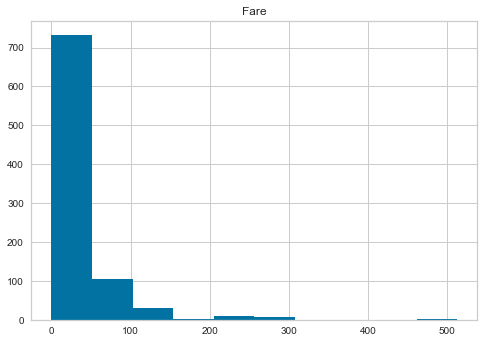

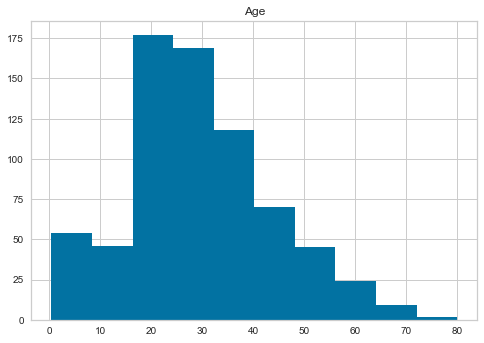

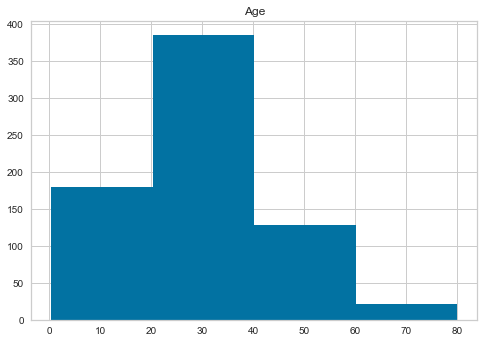

In [6]:
#//*** Use Pandas histogram feature to look at the distributions
for col in numerical_cols:
    df.hist(column=col)

#//*** Four bins shows the greatest cluster of ages
df.hist(column='Age', bins=4)
print()

Feature Creation
Convert text based categorical data to numerical catgegorical data.
- build sexcat (Sex Categorical)
   - values: 
       0. Male
       0. Female
- build embarkatcat (Embark Category)
    - values: 
        0. Southampton
        0. Cherbourg
        0. Queenstown
        0. NaN
- Build deck. Convert Cabin Value into a Deck Assignment. First Class (maybe 2nd) is assigned a cabin. Everyone else was in steerage. http://ssmaritime.com/Titanic-Deck-Plan.jpg

    - values:
        0. Z (Nan, assume Steerage/3rd Class)
        0. C Deck - Shelter Deck
        0. E Deck - Upper Deck
        0. G Deck - Lower Deck
        0. D Deck - Saloon Deck
        0. A Deck - Promenade Deck
        0. B Deck - Bridge Deck
        0. F Deck - Middle Deck
        0. T Deck - Unknown Deck, might be a miscode since it only applies to one entry


In [7]:
#//*** Convert Sex and Embark to Numerical value
#//*** Replace Sex values with a categorical integer. Build a dictionary of unique integers.
#//*** Enumerate generates a counter, value pair
#//*** tuple - places the counter value pair into a list of tuples
#//*** Dict converts the list of tuple pairs into a dictionary.

#//*** Only Convert if these fields are objects. This is to prevent re-running the code twice in iPython.
if (df.dtypes['Sex'] == object):
    sex_dict = dict(tuple(enumerate(df['Sex'].unique())))
    embark_dict = dict(tuple(enumerate(df['Embarked'].unique())))
    #print(sex_dict)
    #print(embark_dict)

    #//*** Build sexcat Categorical column
    df['sexcat'] = df['Sex'].copy()
    
    #//*** replace values using the sex_dict dictionary
    for key,value in sex_dict.items():
        df['sexcat'] = df['sexcat'].replace(value,key)

    #//*** Build the embarkation catergory column
    df['embarkcat'] = df['Embarked'].copy()
    
    #//*** replace values using the embark_dict dictionary
    for key,value in embark_dict.items():
        df['embarkcat'] = df['embarkcat'].replace(value,int(key))
        
    #//*** Convert the Cabin assignment to an integer based on desk assignment. This should correlate similarly with pclass.
    df['deck'] = df['Cabin'].copy()

    #//*** Assign NaN to ZZ
    df['deck'] = df['deck'].fillna("ZZ")
    
    #//*** The Deck assignment is the first letter of the Cabin assignment. Keep the first letter deck
    df['deck'] = df['deck'].apply(lambda x: x[0] )

    #//*** Build a dictionary of unique deck values
    deck_dict=dict(tuple(enumerate(df['deck'].unique())))
    
    #//*** Replace deck values using the deck_dict dictionary
    for key,value in deck_dict.items():
        df['deck'] = df['deck'].replace(value,key)
        
    #//*** Bin Ages into groups of every 5 years
    #//*** yr_bins is an array of 0-80 (max age) step 5
    yr_bins = np.array( range((int(df['Age'].max()/5))+1 ) ) *5

    #//*** df.cut() bins data based on yr_bins
    df['agebin'] = df['Age'].fillna(0).copy()
    df['agebin'] = pd.cut(df['agebin'],bins=yr_bins, labels=yr_bins[1:])



**Are the numerical variables correlated?**

Survival Correlates strongly with Gender (sexcat). There are moderate correlations with Fare and deck assignment

Age - Correlates with PClass (not with fare interestingly) and Sibling Spouse (SibSp). 
    - First Class is associated with older people
    - Sibling and Spouses (ie not single) is associated with younger people.

In [8]:
print("========================================================")
print("Correlations")
print("========================================================")
print(df.corr().replace(1,"*"))
print("========================================================")
print("Correlations Absolute Value > .25")
print("========================================================")
#Generate Correlations using absolute values to measure strength, replace 1 with 0 to hide self correlation
df_cors = df.corr().replace(1,0).abs()
#//*** Display all values with a weak Correlation .25 or Greater
print(df_cors[df_cors > .25 ].fillna("*") )

#//*** Build Dataframes for those who survived (or finsished as in fin_df) 
#//*** and for those who died (or did not finish as in dnf_df)
fin_df = df[ df['Survived'] == 1 ]
dnf_df = df[ df['Survived'] == 0 ]

#//*** [--= Gallows humour is a effect of spending 29 years in the news business. =--]
#//*** [--= I just realized I've been working in News for 29 YEARS!!!. That's a long time =--]

print("========================================================")
print("Survival Correlations")
print("========================================================")
df_cors = fin_df.corr().replace(1,0).abs()
print(df.corr().replace(1,"*"))
print("========================================================")
print("Correlations Absolute Value > .25")
print("========================================================")
print(df_cors[df_cors > .25 ].fillna("*") )

      


Correlations
            Survived     Pclass        Age      SibSp      Parch       Fare     sexcat  embarkcat       deck
Survived           *  -0.338481 -0.0772211 -0.0353225  0.0816294   0.257307   0.543351   0.118026    0.27031
Pclass     -0.338481          *  -0.369226  0.0830814  0.0184427    -0.5495    -0.1319   0.028566    -0.5628
Age       -0.0772211  -0.369226          *  -0.308247  -0.189119  0.0960667 -0.0932536  0.0315564   0.176955
SibSp     -0.0353225  0.0830814  -0.308247          *   0.414838   0.159651   0.114631 -0.0637943 -0.0545254
Parch      0.0816294  0.0184427  -0.189119   0.414838          *   0.216225   0.245489  -0.082144  0.0369444
Fare        0.257307    -0.5495  0.0960667   0.159651   0.216225          *   0.182333  0.0710096   0.376888
sexcat      0.543351    -0.1319 -0.0932536   0.114631   0.245489   0.182333          *   0.128526   0.114229
embarkcat   0.118026   0.028566  0.0315564 -0.0637943  -0.082144  0.0710096   0.128526          *  0.0466888
deck  

**Make some histograms of your data (“A picture is worth a thousand words!”)**

I'm answer most of these questions with histograms. Instead of choosing individual histograms to look at. Why Not look at all of them? I was inspired by DataFrame.hist() as a quick method to quickly look at data. I shifted to loops with MatPlotlib so I could create a color continuity that wasn't the ugly default colors.

**Are the distributions of numerical variables the same or different among survived and not survived? Is the survival rate different for different values? For example, were people more likely to survive if they were younger?**

Death distributions are varied across the categories. Let's start by looking at distributions of Survived and Died for all the numeric variables.

Survival (FIN) Distribution
Survived Distribution:Pclass


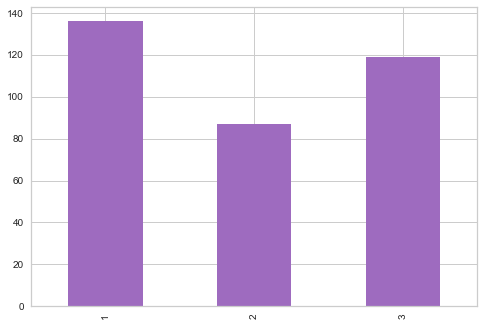

Survived Distribution:Sex


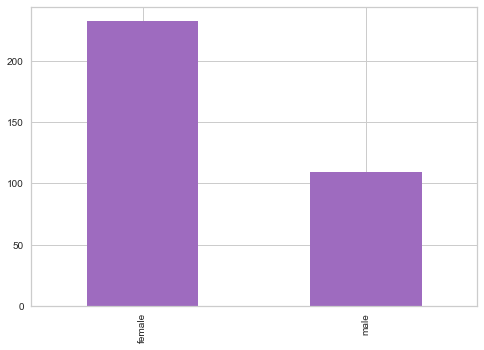

Survived Distribution:agebin


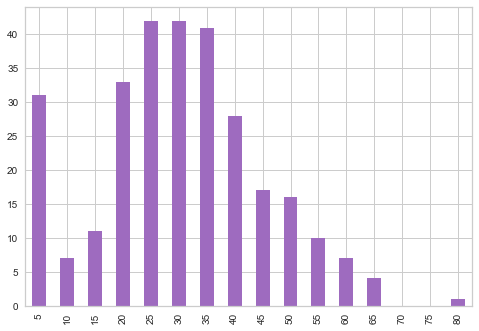

Survived Distribution:SibSp


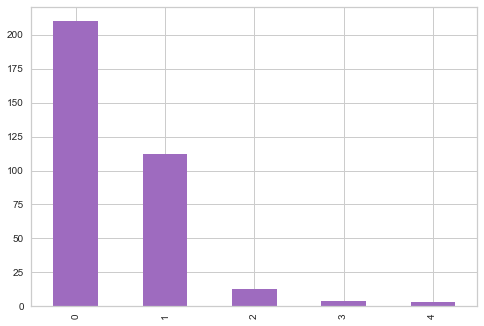

Survived Distribution:Embarked


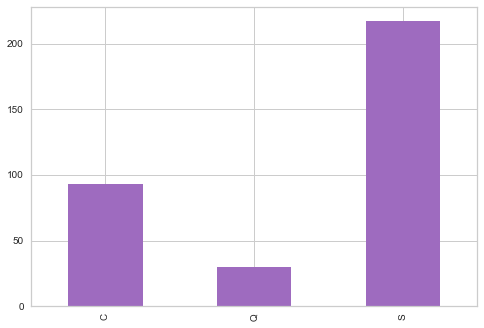

Survived Distribution:deck


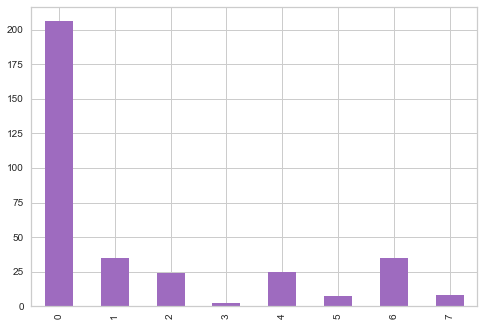

Survived Distribution:Parch


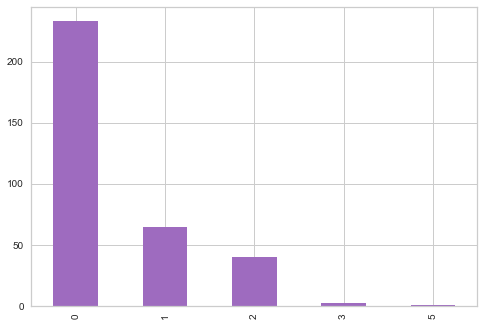

In [9]:
distrib_cols = ['Pclass','Sex','agebin','SibSp','Embarked','deck','Parch']

color_dict = {"survived" : "#9e6bbf","died" : "#7ba65e"}
print("==================================")
print("Survival (FIN) Distribution")
print("==================================")
#fin_df[distrib_cols].hist()
#print()
for cols in distrib_cols:
    print('Survived Distribution:' + cols)
    fin_df[cols].value_counts().sort_index().plot(kind='bar', color=color_dict["survived"])
    plt.show()

Death (DNF) Distribution
Deaths Distribution:Pclass


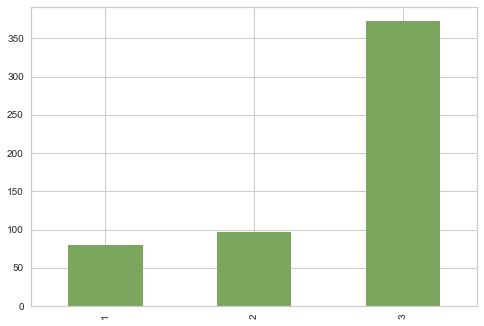

Deaths Distribution:Sex


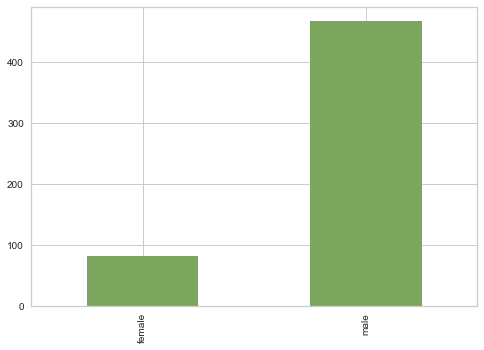

Deaths Distribution:agebin


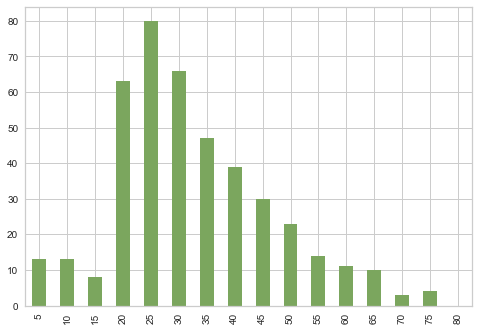

Deaths Distribution:SibSp


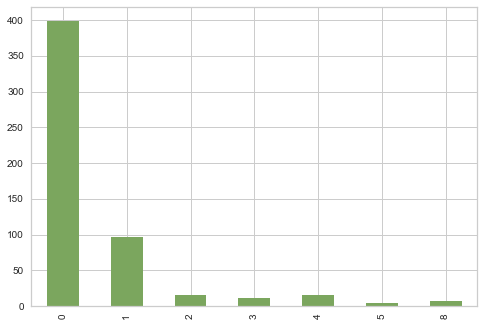

Deaths Distribution:Embarked


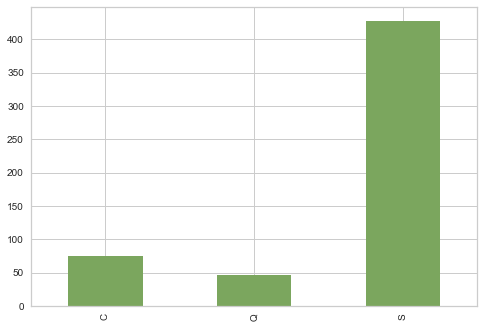

Deaths Distribution:deck


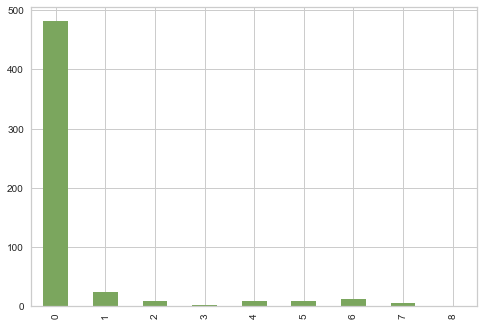

Deaths Distribution:Parch


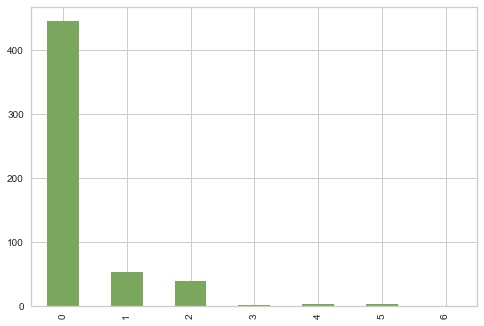

In [10]:
print("==================================")
print("Death (DNF) Distribution")
print("==================================")
#dnf_df[distrib_cols].hist()

for cols in distrib_cols:
    print('Deaths Distribution:' + cols)
    dnf_df[cols].value_counts().sort_index().plot(kind='bar',color=color_dict["died"])
    plt.show()

**Are there different survival rates in different categories? For example, did more women survived than man?**

We can look at the distributions as a stacked barchart portraying the Survivability Percentage for each category.

Examples:
    - Women 76% Survival
    - First Class: 62% Survival
    - 80 Years old: 100% Survival
    - Cabins on deck 2, 4, 6: 77% Survival
   

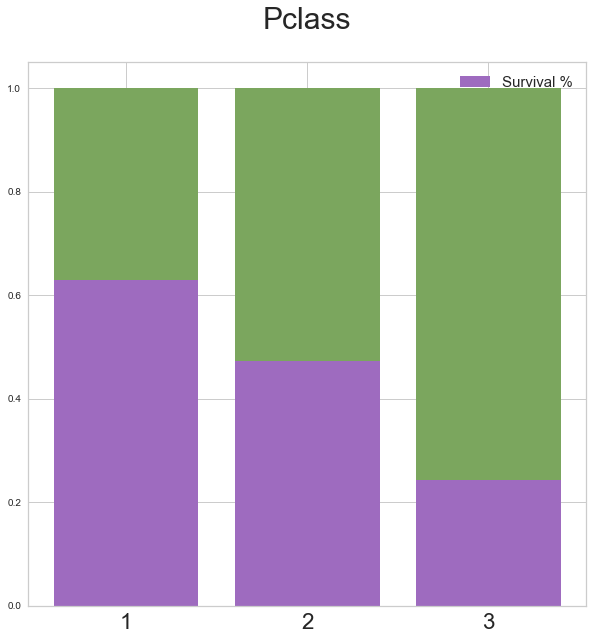

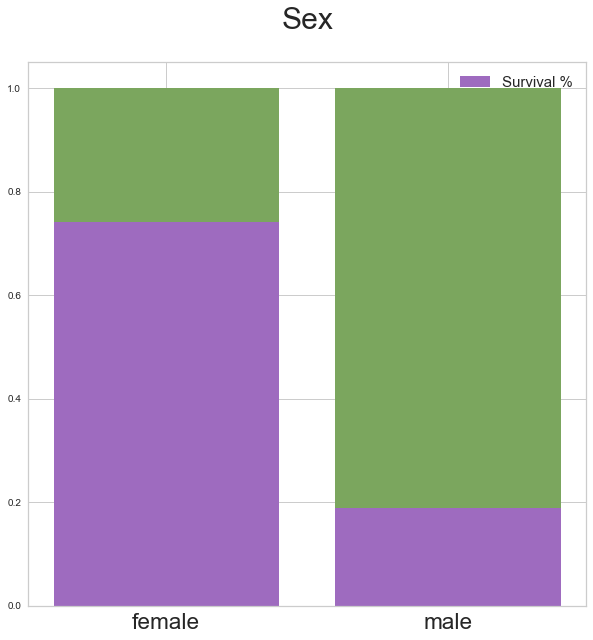

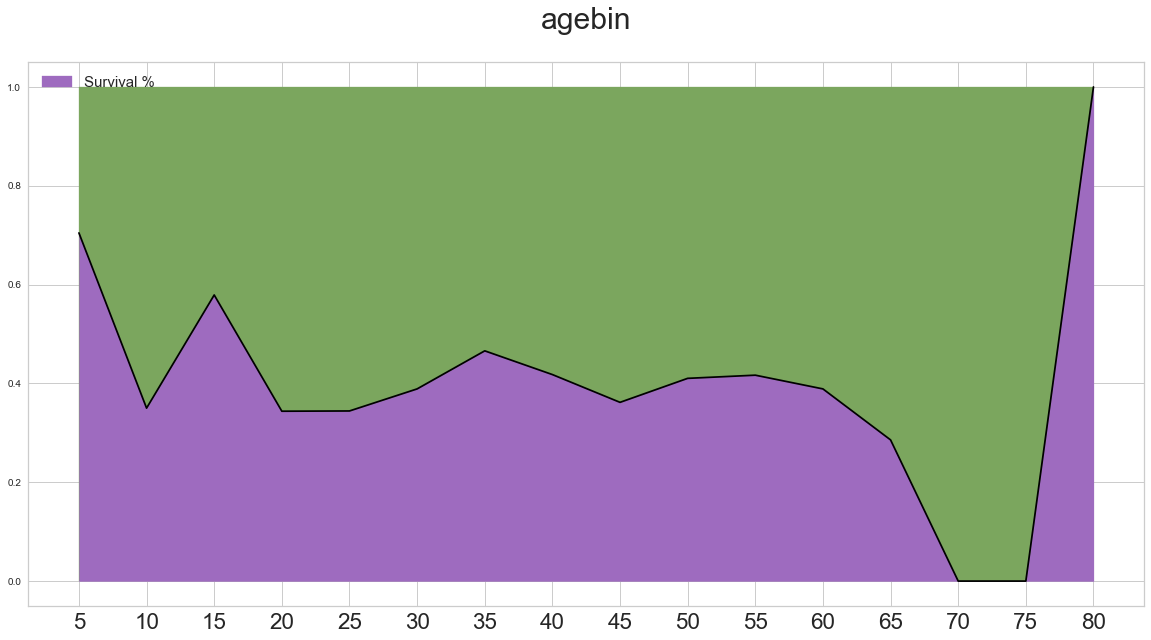

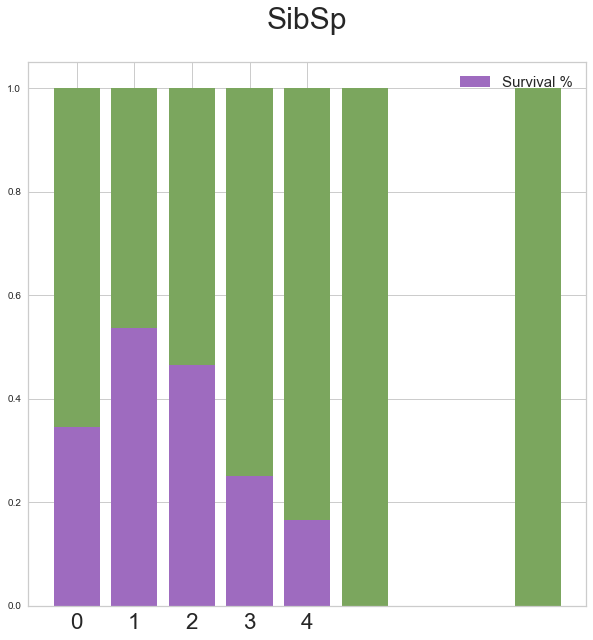

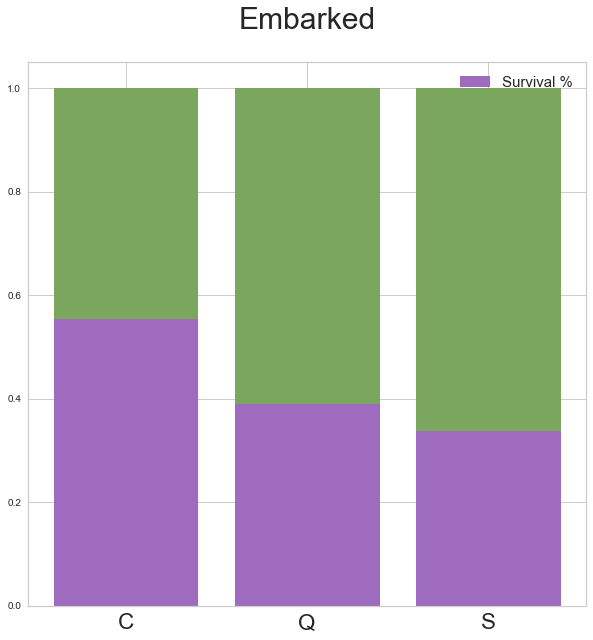

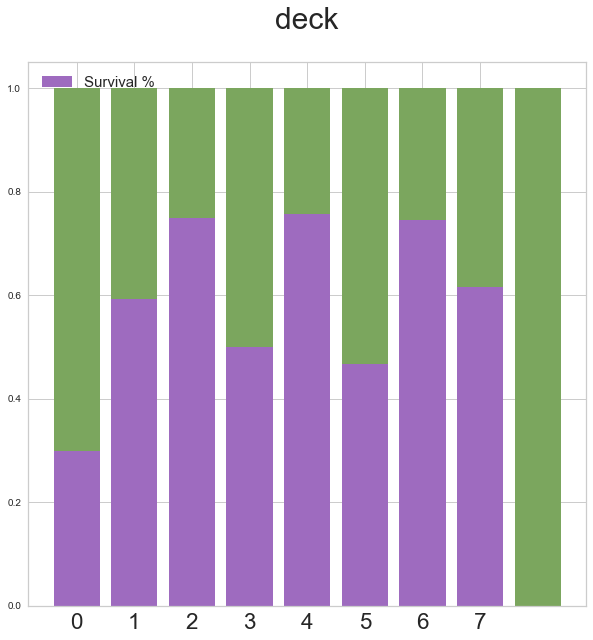

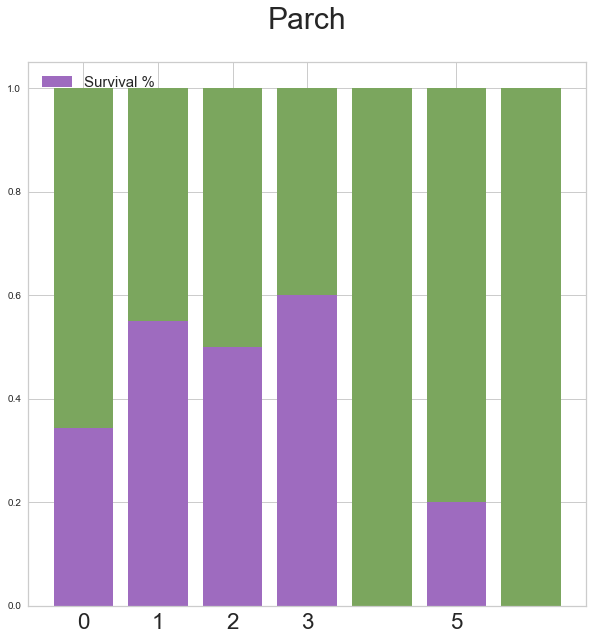

In [11]:
#//*** Display the Survival Percentages for each Column/Value

for cols in distrib_cols:
    
    #//*** Survived DF
    spmf = (fin_df[cols].value_counts().sort_index())
    
    #//*** All Passengers
    dpmf = (df[cols].value_counts().sort_index())
    

    #//*** Font value to apply across the plot
    bar_font_size = 30

    #//*** Somewhat arbitrary value of the display Bar width
    bar_width = .35
    
    #//*** Define Subplots
    if cols == 'agebin':
        fig, ax = plt.subplots(figsize=(20, 10))
    else:
        fig, ax = plt.subplots(figsize=(10, 10))
        
    
    
    if cols == 'agebin':
        #//**** Draw 1 as in 100% as a background to create the illusion of stacked bar charts to highlight survival chances by category
        #plt.plot((spmf/dpmf).index, 1, color=color_dict["died"])

        #//**** Draw the percentage of survival for eac category
        plt.fill_between((spmf/dpmf).index, 1, color=color_dict["died"])
        plt.fill_between((spmf/dpmf).index, spmf/dpmf, label='Survival %', color=color_dict["survived"])
        plt.plot((spmf/dpmf).index, spmf/dpmf, color="black")
        #plt.fill_between((spmf/dpmf).index, spmf/dpmf,color='g',alpha=.5)
    else:
        #//**** Draw 1 as in 100% as a background to create the illusion of stacked bar charts to highlight survival chances by category
        plt.bar((spmf/dpmf).index, 1, color=color_dict["died"])

        #//**** Draw the percentage of survival for eac category
        plt.bar((spmf/dpmf).index, spmf/dpmf, label='Survival %', color=color_dict["survived"])

    plt.title(cols,fontsize=bar_font_size,y=1.05)
    
    #//*** Label the X axis. Replaces the index values with the labels in the ethnic list.
    plt.xticks(spmf.index,fontsize=bar_font_size*.75)

    #plt.yticks(fontsize=bar_font_size*.75)

    #//*** Label the Y axis
    #plt.ylabel("New Cases per 100k", fontsize=bar_font_size)

    #//*** Draw the Legend
    plt.legend(fontsize=bar_font_size*.5)

    #//*** Display the Graph
    plt.show()



**Look at summary information about your data (total, mean, min, max, freq, unique, etc.)  Does this present any more questions for you?  Does it lead you to a conclusion yet?**

I reinforces what the distribution graphs reflect. The mean age for the survived is less than the mean overall. The Fare of survivors was higher than the mean overall with a much higher standard deviation. Being wealthy increased the survival chances. No big secret there.

In [12]:
print(df.describe())
print(fin_df.describe())
print(dnf_df.describe())

#age class fare 

         Survived      Pclass         Age       SibSp       Parch        Fare      sexcat   embarkcat        deck
count  891.000000  891.000000  714.000000  891.000000  891.000000  891.000000  891.000000  891.000000  891.000000
mean     0.383838    2.308642   29.699118    0.523008    0.381594   32.204208    0.352413    0.368126    0.811448
std      0.486592    0.836071   14.526497    1.102743    0.806057   49.693429    0.477990    0.647601    1.815143
min      0.000000    1.000000    0.420000    0.000000    0.000000    0.000000    0.000000    0.000000    0.000000
25%      0.000000    2.000000   20.125000    0.000000    0.000000    7.910400    0.000000    0.000000    0.000000
50%      0.000000    3.000000   28.000000    0.000000    0.000000   14.454200    0.000000    0.000000    0.000000
75%      1.000000    3.000000   38.000000    1.000000    0.000000   31.000000    1.000000    1.000000    0.000000
max      1.000000    3.000000   80.000000    8.000000    6.000000  512.329200    1.00000

**Most of the passengers are around 20 to 30 years old and don't have siblings or relatives with them. A large amount of the tickets sold were less than \\$50. There are very few tickets sold where the fare was over \\$500.**

**Make some bar charts for variables with only a few options.**

- **Ticket and Cabin have more than 100 variables so don’t do those!**

I did reduce the cabins to their deck assignments which was interesting.
Here are more bar graphs as PMFs.

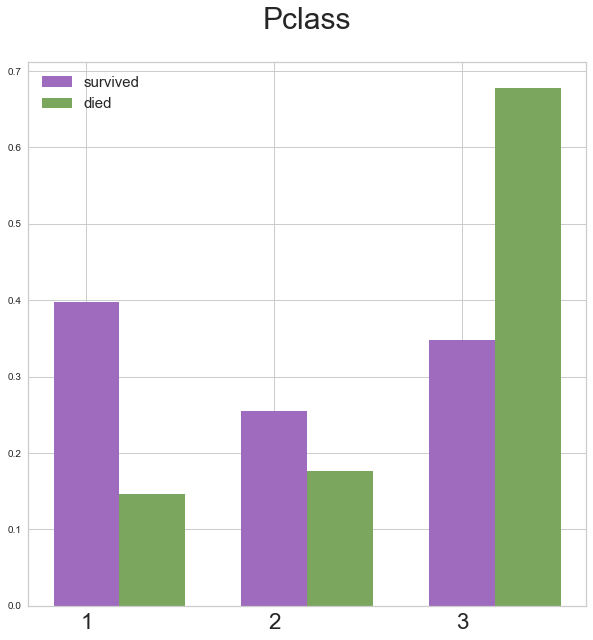

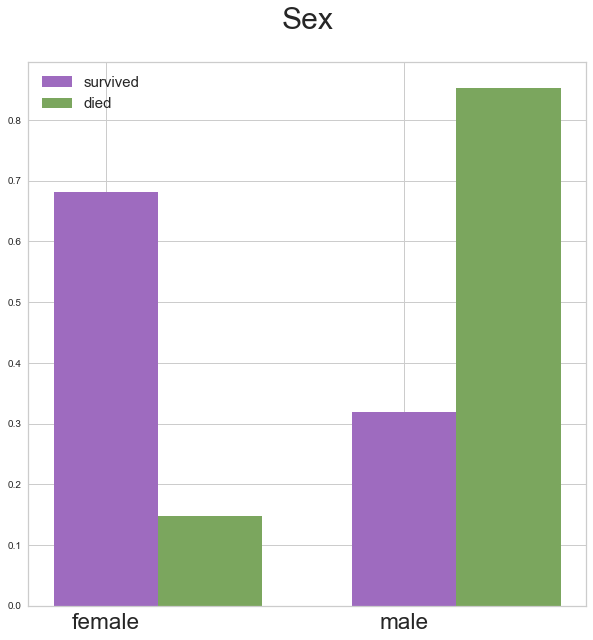

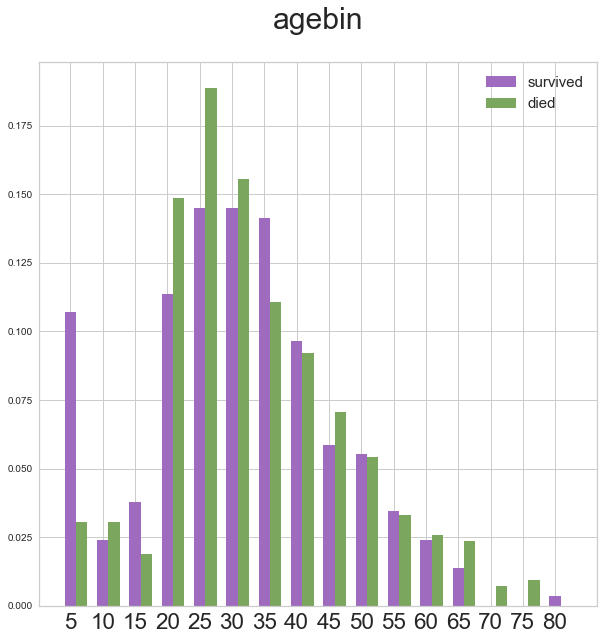

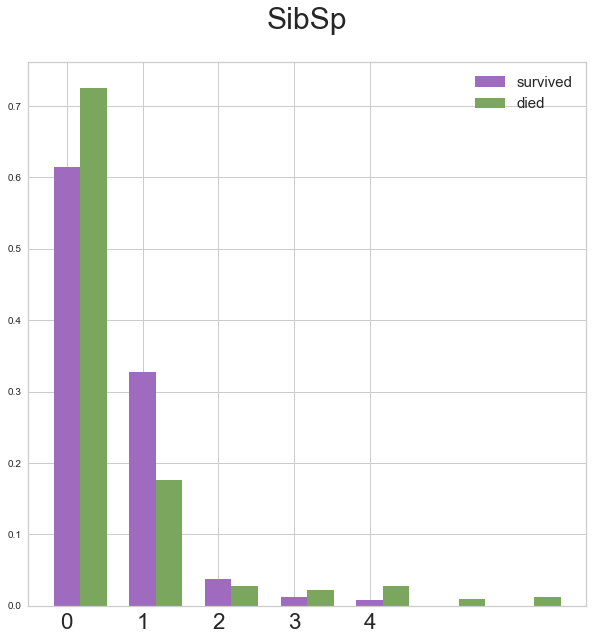

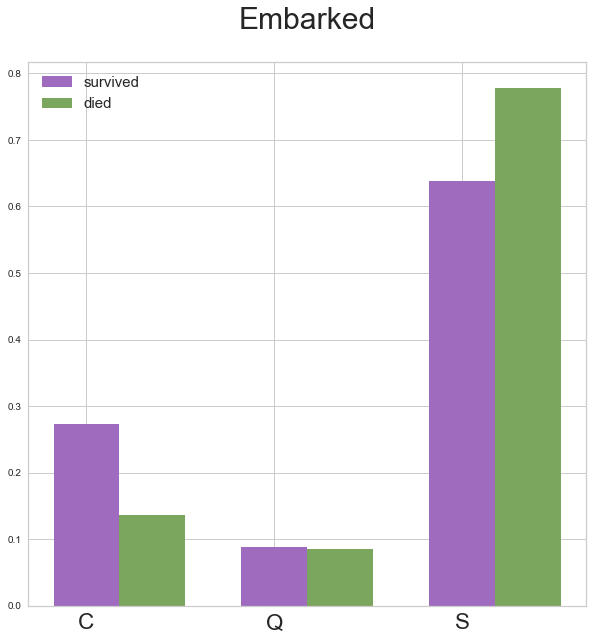

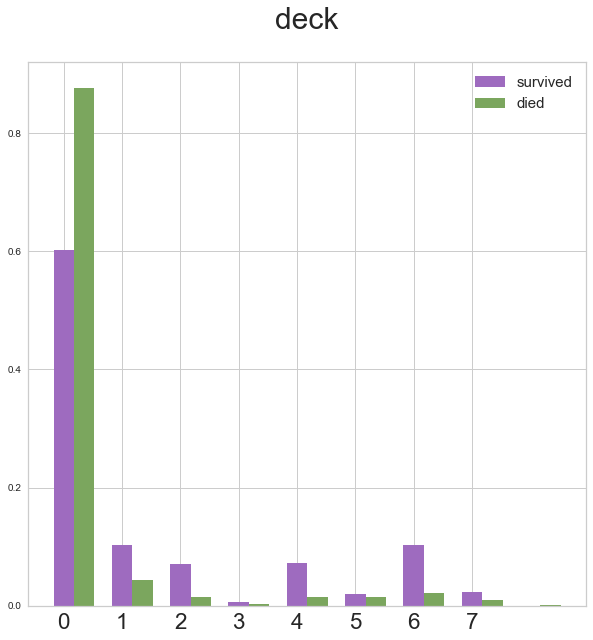

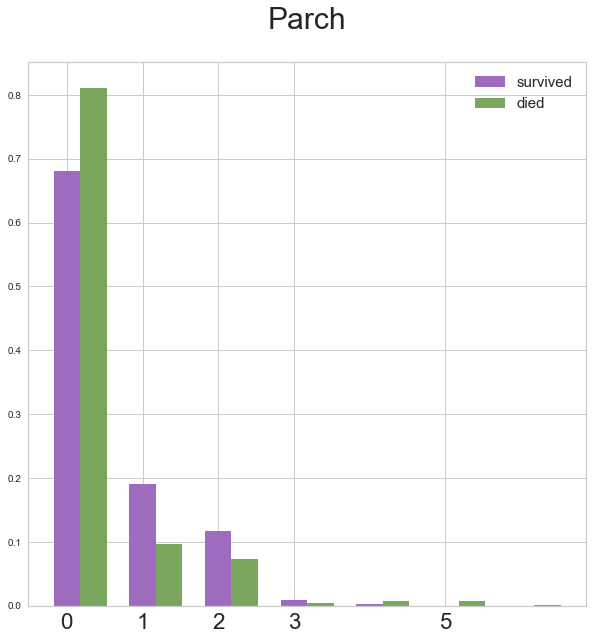

In [13]:
#//**************************************************************
#//*** View the distributions as Probability mass function
#//**************************************************************
# //*****************************************
# // This code came straight from DSC  530!!!
# //*****************************************
# //*** Build a probability mass function
# //*****************************************
# //*** Returns Series as a PMF
# //*****************************************
def build_pmf(input_series):
    output_series = input_series.copy()
    total_values = input_series.sum()
    for value,freq in output_series.items():
        output_series.loc[value] = freq/total_values
    return output_series

for cols in distrib_cols:
    
    spmf = build_pmf(fin_df[cols].value_counts().sort_index())
    dpmf = build_pmf(dnf_df[cols].value_counts().sort_index())
    
    #//*** Index is Used as an offset value which is used to draw the individual bar graphs
    #index = np.arange(len(ethnic)-1)

    #//*** Font value to apply across the plot
    bar_font_size = 30

    #//*** Somewhat arbitrary value of the display Bar width
    bar_width = .35

    #//*** Define Subplots
    fig, ax = plt.subplots(figsize=(10, 10))
    
    index = np.arange(len(dpmf))
    index2 = np.arange(len(spmf))
    
    
    #//*** Draw the Actual Values
    #//*** X = Index which is a range 1 - 5
    #//*** Y = Actual Case Values per 100k
    #//*** Bar Width (How Wide to draw)
    #//*** Color = List based color palette
    #//*** Note: No Labels, we don't want the ethnicity to be drawn in the legend
    plt.bar(index2,spmf, bar_width, label='survived',color=color_dict["survived"])
    plt.bar(index+bar_width ,dpmf, bar_width, label='died', color=color_dict["died"])

    #//*** Draw the Expected Values
    #//*** X = Index + a multiple of the bar width. The multiple is to account for different sized bar widths
    #//*** Y = Expected Case Values per 100k
    #//*** Multiple of Bar Width (How much smaller to draw the bar)
    #//*** Color = Hardcoded to black, with an alpha of .55 to make it gray(ish)
    #//*** Label = Only one label for the Legend
    #plt.bar(index+bar_width/1.35,expected_cases[1:], bar_width/2,color= 'black',alpha=.55,label='Expected Cases')

    plt.title(cols,fontsize=bar_font_size,y=1.05)

    try:
        #//*** Label the X axis. Replaces the index values with the labels in the ethnic list.
        plt.xticks(index,spmf.index,fontsize=bar_font_size*.75)
    except:
        plt.xticks(spmf.index,fontsize=bar_font_size*.75)
    #plt.yticks(fontsize=bar_font_size*.75)

    #//*** Label the Y axis
    #plt.ylabel("New Cases per 100k", fontsize=bar_font_size)

    #//*** Draw the Legend
    plt.legend(fontsize=bar_font_size*.5)

    #//*** Display the Graph
    plt.show()




**To see if the data is correlated, make some Pearson Ranking charts**

**The correlation between the variables is low (1 or -1 is high positive or high negative, 0 is low or no correlation)  These results show there is “some” positive correlation but it’s not a high correlation.**

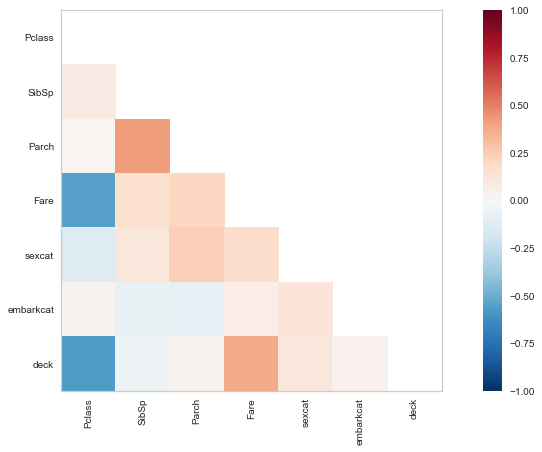

In [14]:
plt.rcParams['figure.figsize'] = (15, 7)

# import the package for visulization of the correlation
from yellowbrick.features import Rank2D

num_features = ['Pclass','SibSp','Parch','Fare','sexcat','embarkcat','deck']
# extract the numpy arrays from the data frame
X = df[num_features].values

# instantiate the visualizer with the Covariance ranking algorithm
visualizer = Rank2D(features=num_features, algorithm='pearson')
visualizer.fit(X)                # Fit the data to the visualizer
visualizer.transform(X)             # Transform the data
plt.show()

**Use Parallel Coordinates visualization to compare the distributions of numerical variables between passengers that survived and those that did not survive.**
**That’s a cool chart, isn’t it?!  Passengers traveling with siblings on the boat have a higher death rate and passengers who paid a higher fare had a higher survival rate.**

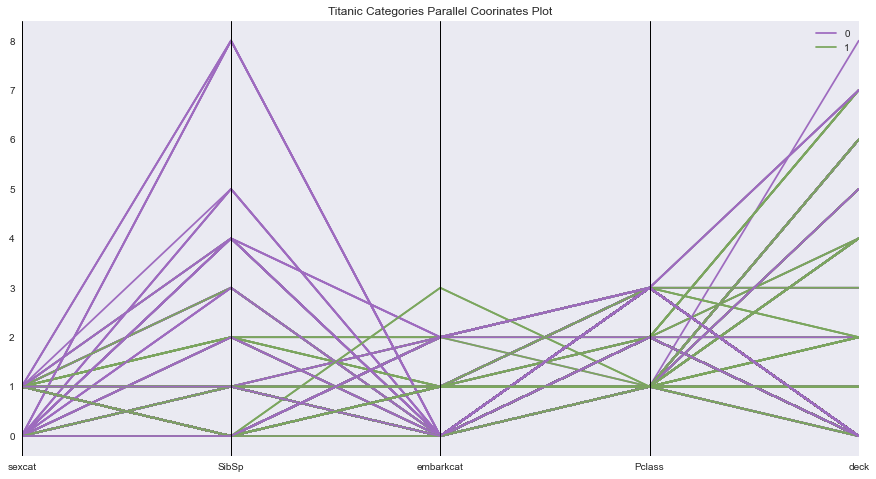

In [15]:
num_features = ['sexcat','SibSp','embarkcat','Pclass','deck']

with plt.style.context(("ggplot", "seaborn")):
    fig = plt.figure(figsize=(15,8))
    pd.plotting.parallel_coordinates(df, "Survived",
                                     cols=num_features,
                                     color=[color_dict['survived'],color_dict['died']],
                                     #alpha=0.3,
                                     #axvlines_kwds={"color":"red"})
                                    )
    #plt.xticks(rotation=90)
    plt.title("Titanic Categories Parallel Coorinates Plot")

Use Stack Bar Charts to compare passengers who survived to passengers who didn’t survive based on the other variables.
More females survived than men.  3rd Class Tickets had a lower survival rate.  Also, Embarkation from Southampton port had a lower survival rate.

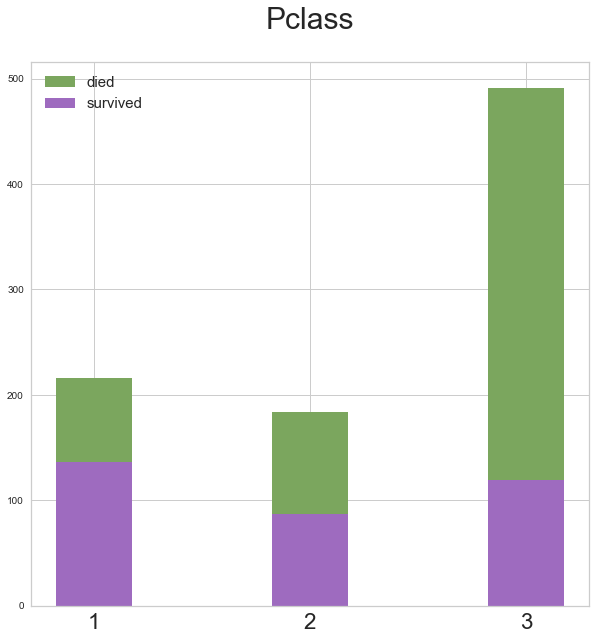

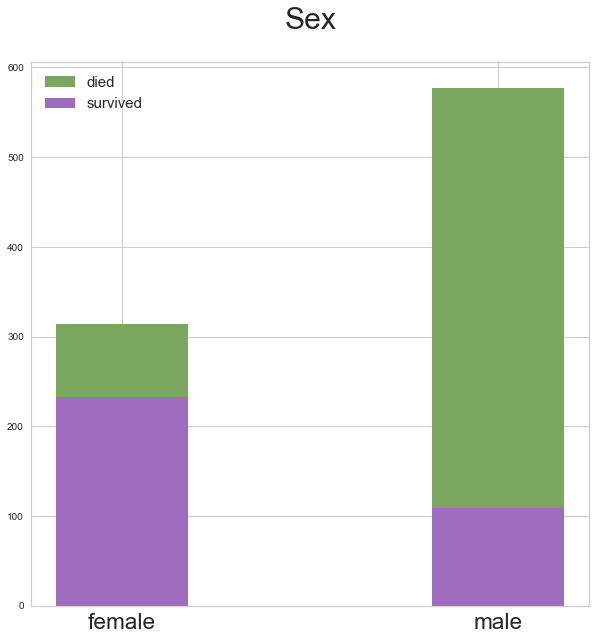

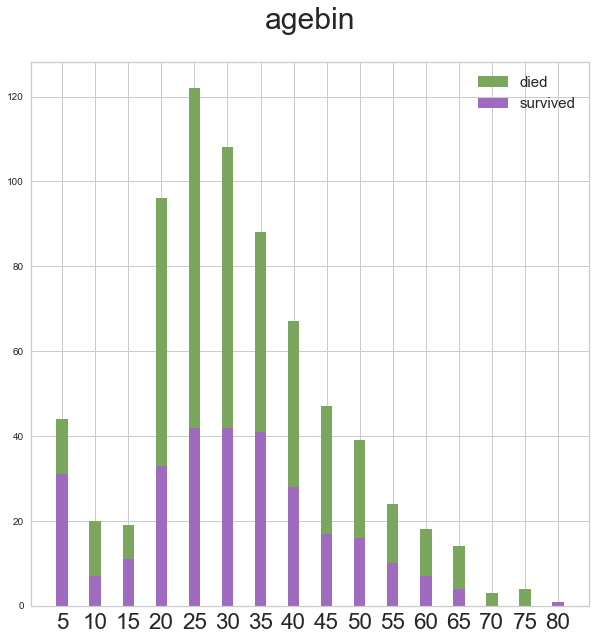

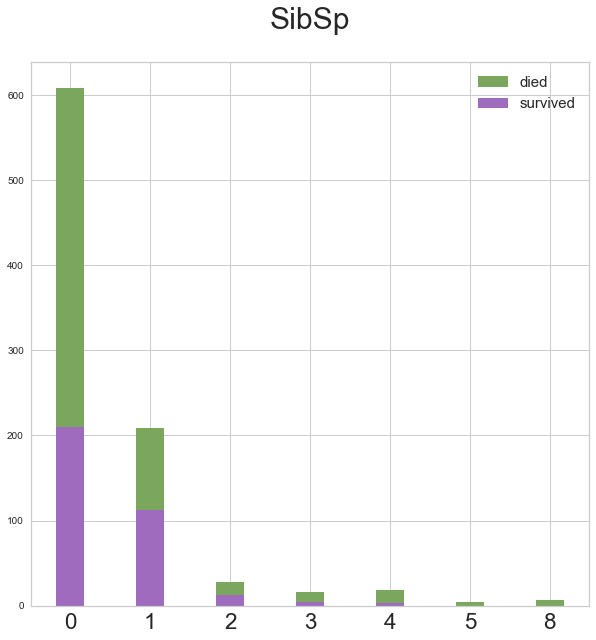

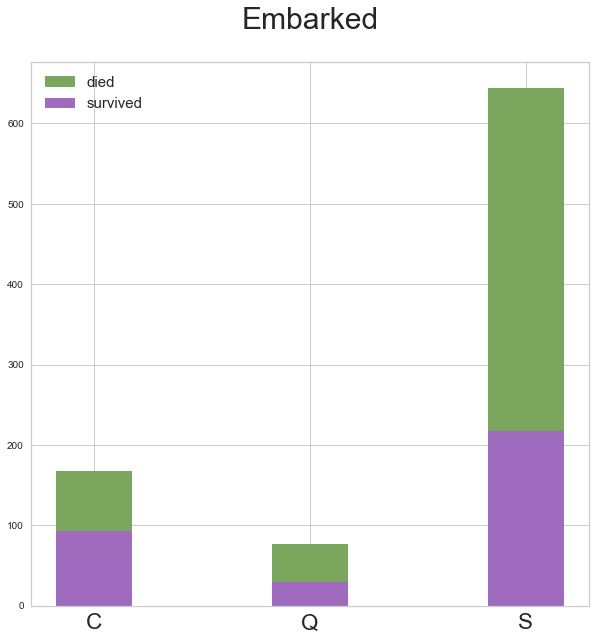

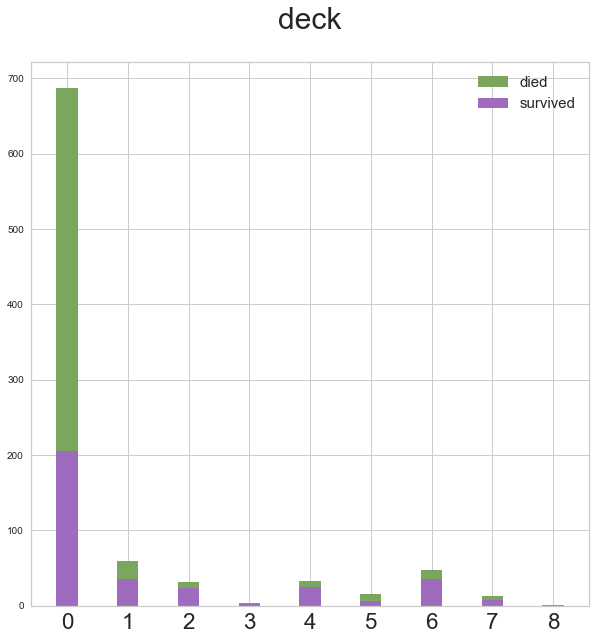

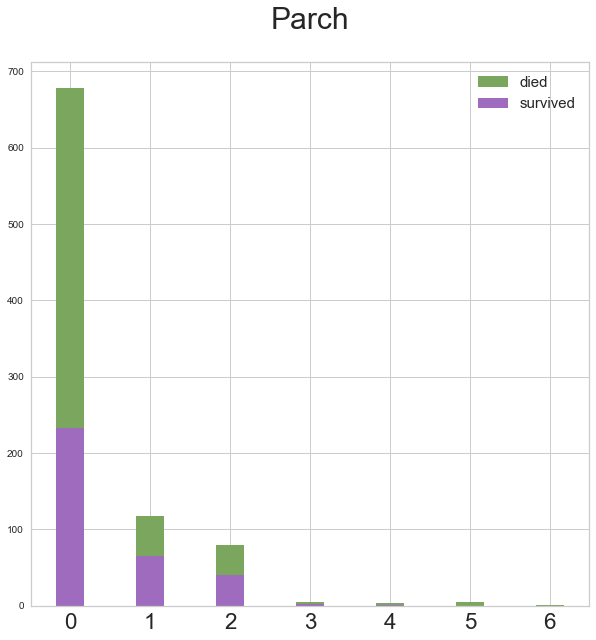

In [16]:
#//**************************************************************
#//*** View the distributions as Probability mass function
#//**************************************************************
#//*** Technically these aren't stacked bar charts which would use the bottom value.
#//*** Since these are essentially percentages I'm drawing the survived values over the total passenger numbers
#//*** It's inelegant, but it works.
# //*****************************************
# // This code came straight from DSC  530!!!
# //*****************************************
# //*** Build a probability mass function
# //*****************************************
# //*** Returns Series as a PMF
# //*****************************************
def build_pmf(input_series):
    output_series = input_series.copy()
    total_values = input_series.sum()
    for value,freq in output_series.items():
        output_series.loc[value] = freq/total_values
    return output_series

for cols in distrib_cols:
    
    spmf = (fin_df[cols].value_counts().sort_index())
    dpmf = (df[cols].value_counts().sort_index())
    
    #//*** Index is Used as an offset value which is used to draw the individual bar graphs
    #index = np.arange(len(ethnic)-1)

    #//*** Font value to apply across the plot
    bar_font_size = 30

    #//*** Somewhat arbitrary value of the display Bar width
    bar_width = .35

    #//*** Define Subplots
    fig, ax = plt.subplots(figsize=(10, 10))
    
    index = np.arange(len(dpmf))
    index2 = np.arange(len(spmf))
    
    
    #//*** Draw the Actual Values
    #//*** X = Index which is a range 1 - 5
    #//*** Y = Actual Case Values per 100k
    #//*** Bar Width (How Wide to draw)
    #//*** Color = List based color palette
    #//*** Note: No Labels, we don't want the ethnicity to be drawn in the legend
    plt.bar(index ,dpmf, bar_width, label='died', color=color_dict["died"])
    plt.bar(index2,spmf, bar_width, label='survived',color=color_dict["survived"])


    #//*** Draw the Expected Values
    #//*** X = Index + a multiple of the bar width. The multiple is to account for different sized bar widths
    #//*** Y = Expected Case Values per 100k
    #//*** Multiple of Bar Width (How much smaller to draw the bar)
    #//*** Color = Hardcoded to black, with an alpha of .55 to make it gray(ish)
    #//*** Label = Only one label for the Legend
    #plt.bar(index+bar_width/1.35,expected_cases[1:], bar_width/2,color= 'black',alpha=.55,label='Expected Cases')

    plt.title(cols,fontsize=bar_font_size,y=1.05)

    #//*** Label the X axis. Replaces the index values with the labels in the ethnic list.
    try:
        plt.xticks(index,spmf.index,fontsize=bar_font_size*.75)
    except:
        plt.xticks(index,dpmf.index,fontsize=bar_font_size*.75)
    #plt.yticks(fontsize=bar_font_size*.75)

    #//*** Label the Y axis
    #plt.ylabel("New Cases per 100k", fontsize=bar_font_size)

    #//*** Draw the Legend
    plt.legend(fontsize=bar_font_size*.5)

    #//*** Display the Graph
    plt.show()




# Tutorial Code Below #

In [17]:
#Titanic Tutorial Part 1
#Graphics Analysis
#import pandas as pd
import yellowbrick

In [18]:
#Step 1:  Load data into a dataframe
addr1 = "z_wk06_train.csv"
data = pd.read_csv(addr1)

In [19]:
# Step 2:  check the dimension of the table
print("The dimension of the table is: ", data.shape)

The dimension of the table is:  (891, 12)


In [20]:
#Step 3:  Look at the data
print(data.head(5))

   PassengerId  Survived  Pclass                                               Name     Sex   Age  SibSp  Parch            Ticket     Fare Cabin Embarked
0            1         0       3                            Braund, Mr. Owen Harris    male  22.0      1      0         A/5 21171   7.2500   NaN        S
1            2         1       1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1      0          PC 17599  71.2833   C85        C
2            3         1       3                             Heikkinen, Miss. Laina  female  26.0      0      0  STON/O2. 3101282   7.9250   NaN        S
3            4         1       1       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1      0            113803  53.1000  C123        S
4            5         0       3                           Allen, Mr. William Henry    male  35.0      0      0            373450   8.0500   NaN        S


In [21]:
#Step 5:  what type of variables are in the table 
print("Describe Data")
print(data.describe())
print("Summarized Data")
print(data.describe(include=['O']))


Describe Data
       PassengerId    Survived      Pclass         Age       SibSp       Parch        Fare
count   891.000000  891.000000  891.000000  714.000000  891.000000  891.000000  891.000000
mean    446.000000    0.383838    2.308642   29.699118    0.523008    0.381594   32.204208
std     257.353842    0.486592    0.836071   14.526497    1.102743    0.806057   49.693429
min       1.000000    0.000000    1.000000    0.420000    0.000000    0.000000    0.000000
25%     223.500000    0.000000    2.000000   20.125000    0.000000    0.000000    7.910400
50%     446.000000    0.000000    3.000000   28.000000    0.000000    0.000000   14.454200
75%     668.500000    1.000000    3.000000   38.000000    1.000000    0.000000   31.000000
max     891.000000    1.000000    3.000000   80.000000    8.000000    6.000000  512.329200
Summarized Data
                                 Name   Sex  Ticket    Cabin Embarked
count                             891   891     891      204      889
unique     

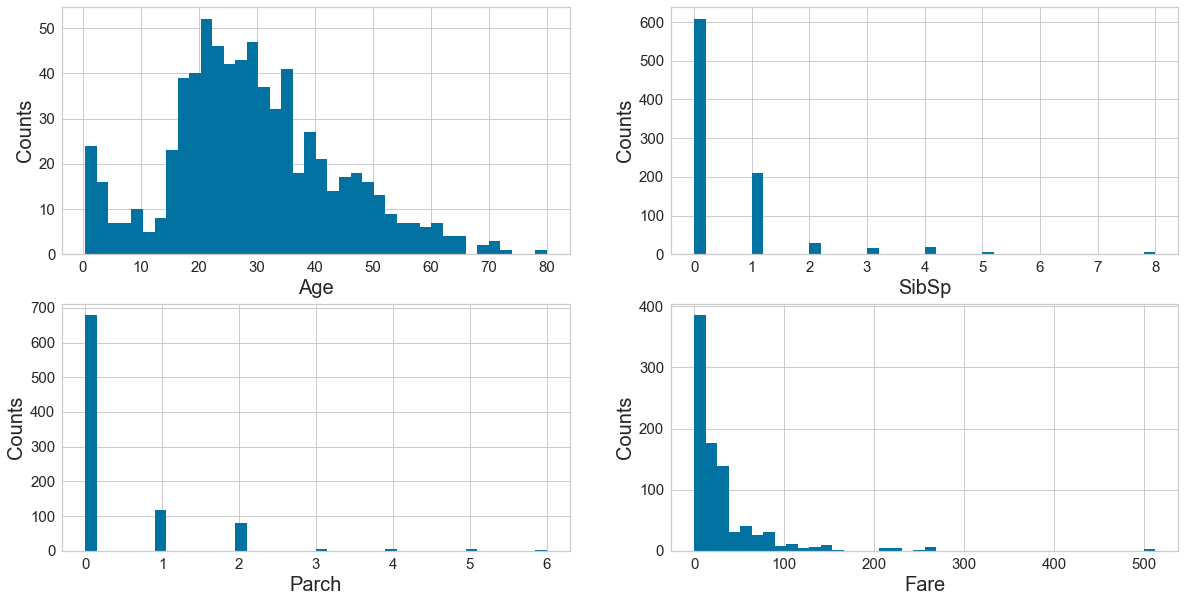

In [22]:
#Step 6: import visulization packages
import matplotlib.pyplot as plt

# set up the figure size
plt.rcParams['figure.figsize'] = (20, 10)

# make subplots
fig, axes = plt.subplots(nrows = 2, ncols = 2)

# Specify the features of interest
num_features = ['Age', 'SibSp', 'Parch', 'Fare']
xaxes = num_features
yaxes = ['Counts', 'Counts', 'Counts', 'Counts']

# draw histograms
axes = axes.ravel()
for idx, ax in enumerate(axes):
    ax.hist(data[num_features[idx]].dropna(), bins=40)
    ax.set_xlabel(xaxes[idx], fontsize=20)
    ax.set_ylabel(yaxes[idx], fontsize=20)
    ax.tick_params(axis='both', labelsize=15)
plt.show()

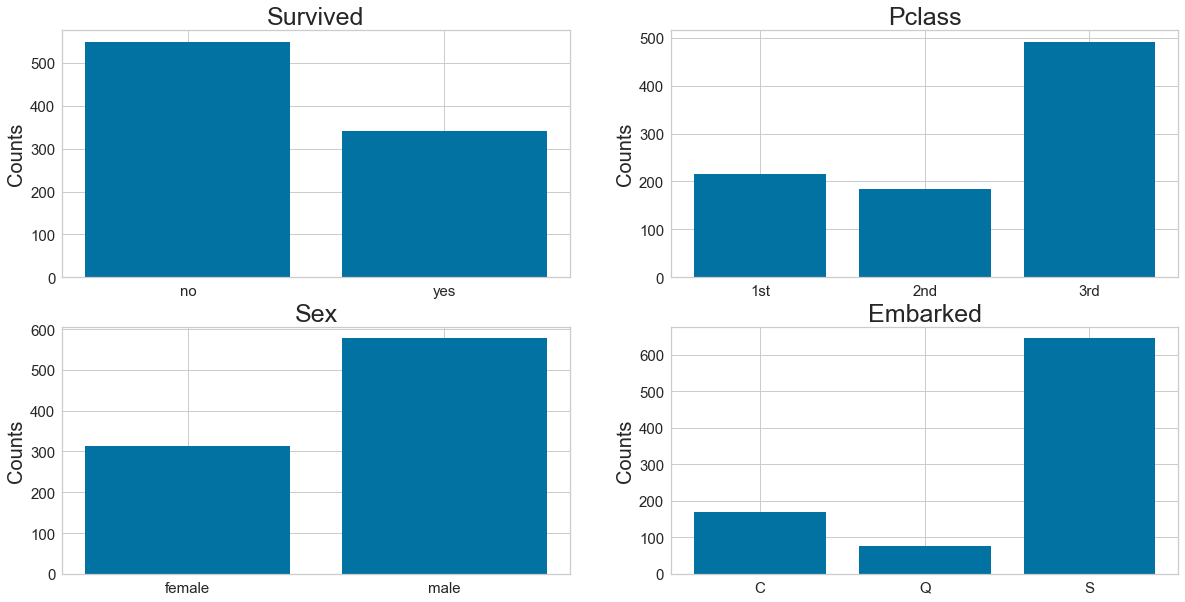

In [23]:
#7:  Barcharts: set up the figure size
#%matplotlib inline
plt.rcParams['figure.figsize'] = (20, 10)

# make subplots
fig, axes = plt.subplots(nrows = 2, ncols = 2)

# make the data read to feed into the visulizer
X_Survived = data.replace({'Survived': {1: 'yes', 0: 'no'}}).groupby('Survived').size().reset_index(name='Counts')['Survived']
Y_Survived = data.replace({'Survived': {1: 'yes', 0: 'no'}}).groupby('Survived').size().reset_index(name='Counts')['Counts']
# make the bar plot
axes[0, 0].bar(X_Survived, Y_Survived)
axes[0, 0].set_title('Survived', fontsize=25)
axes[0, 0].set_ylabel('Counts', fontsize=20)
axes[0, 0].tick_params(axis='both', labelsize=15)

# make the data read to feed into the visulizer
X_Pclass = data.replace({'Pclass': {1: '1st', 2: '2nd', 3: '3rd'}}).groupby('Pclass').size().reset_index(name='Counts')['Pclass']
Y_Pclass = data.replace({'Pclass': {1: '1st', 2: '2nd', 3: '3rd'}}).groupby('Pclass').size().reset_index(name='Counts')['Counts']
# make the bar plot
axes[0, 1].bar(X_Pclass, Y_Pclass)
axes[0, 1].set_title('Pclass', fontsize=25)
axes[0, 1].set_ylabel('Counts', fontsize=20)
axes[0, 1].tick_params(axis='both', labelsize=15)

# make the data read to feed into the visulizer
X_Sex = data.groupby('Sex').size().reset_index(name='Counts')['Sex']
Y_Sex = data.groupby('Sex').size().reset_index(name='Counts')['Counts']
# make the bar plot
axes[1, 0].bar(X_Sex, Y_Sex)
axes[1, 0].set_title('Sex', fontsize=25)
axes[1, 0].set_ylabel('Counts', fontsize=20)
axes[1, 0].tick_params(axis='both', labelsize=15)

# make the data read to feed into the visulizer
X_Embarked = data.groupby('Embarked').size().reset_index(name='Counts')['Embarked']
Y_Embarked = data.groupby('Embarked').size().reset_index(name='Counts')['Counts']
# make the bar plot
axes[1, 1].bar(X_Embarked, Y_Embarked)
axes[1, 1].set_title('Embarked', fontsize=25)
axes[1, 1].set_ylabel('Counts', fontsize=20)
axes[1, 1].tick_params(axis='both', labelsize=15)
plt.show()

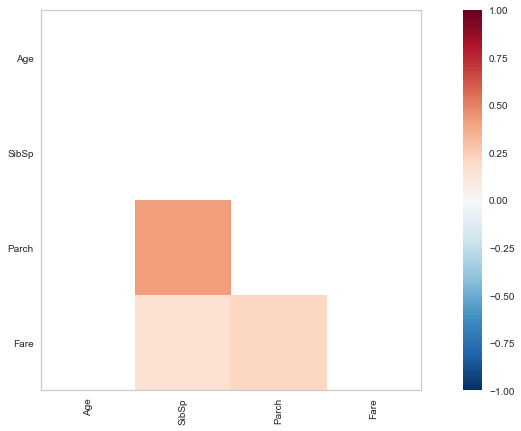

In [24]:
#Step 8: Pearson Ranking
#set up the figure size
#%matplotlib inline
plt.rcParams['figure.figsize'] = (15, 7)

# import the package for visulization of the correlation
from yellowbrick.features import Rank2D

# extract the numpy arrays from the data frame
X = data[num_features].values

# instantiate the visualizer with the Covariance ranking algorithm
visualizer = Rank2D(features=num_features, algorithm='pearson')
visualizer.fit(X)                # Fit the data to the visualizer
visualizer.transform(X)             # Transform the data
#visualizer.poof(outpath="d://pcoords1.png") # Draw/show/poof the data
plt.show()

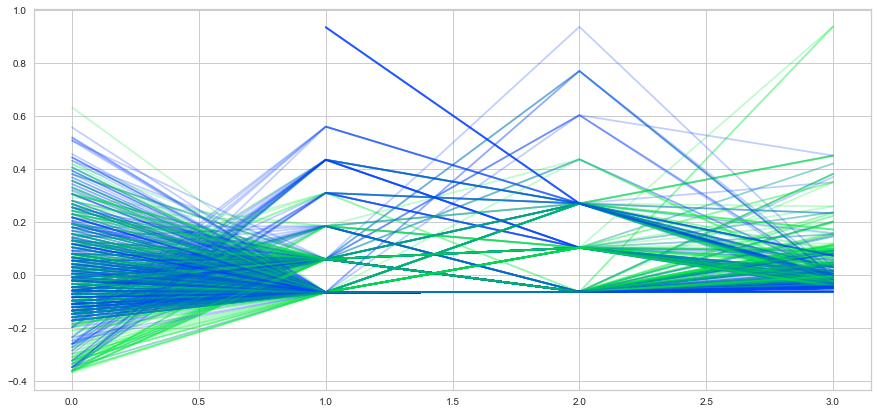

In [25]:
# Step 9:  Compare variables against Survived and Not Survived
#set up the figure size
#%matplotlib inline
plt.rcParams['figure.figsize'] = (15, 7)
plt.rcParams['font.size'] = 50

# setup the color for yellowbrick visulizer
from yellowbrick.style import set_palette
set_palette('sns_bright')

# import packages
from yellowbrick.features import ParallelCoordinates
# Specify the features of interest and the classes of the target
classes = ['Not-survived', 'Survived']
num_features = ['Age', 'SibSp', 'Parch', 'Fare']

# copy data to a new dataframe
data_norm = data.copy()
# normalize data to 0-1 range
for feature in num_features:
    data_norm[feature] = (data[feature] - data[feature].mean(skipna=True)) / (data[feature].max(skipna=True) - data[feature].min(skipna=True))

# Extract the numpy arrays from the data frame
X = data_norm[num_features].values
y = data.Survived.values

# Instantiate the visualizer
# Instantiate the visualizer
visualizer = ParallelCoordinates(classes=classes, features=num_features)


visualizer.fit(X, y)      # Fit the data to the visualizer
visualizer.transform(X)   # Transform the data
#visualizer.poof(outpath="d://pcoords2.png") # Draw/show/poof the data
plt.show()

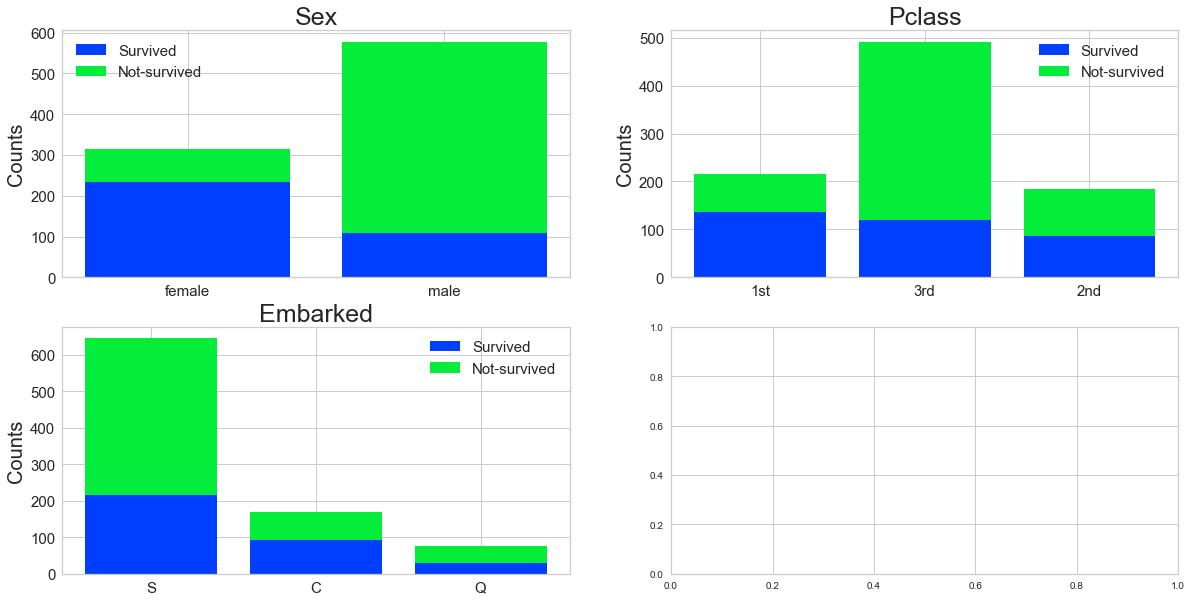

In [26]:
# Step 10 - stacked bar charts to compare survived/not survived
#set up the figure size
#%matplotlib inline
plt.rcParams['figure.figsize'] = (20, 10)

# make subplots
fig, axes = plt.subplots(nrows = 2, ncols = 2)

# make the data read to feed into the visulizer
Sex_survived = data.replace({'Survived': {1: 'Survived', 0: 'Not-survived'}})[data['Survived']==1]['Sex'].value_counts()
Sex_not_survived = data.replace({'Survived': {1: 'Survived', 0: 'Not-survived'}})[data['Survived']==0]['Sex'].value_counts()
Sex_not_survived = Sex_not_survived.reindex(index = Sex_survived.index)
# make the bar plot
p1 = axes[0, 0].bar(Sex_survived.index, Sex_survived.values)
p2 = axes[0, 0].bar(Sex_not_survived.index, Sex_not_survived.values, bottom=Sex_survived.values)
axes[0, 0].set_title('Sex', fontsize=25)
axes[0, 0].set_ylabel('Counts', fontsize=20)
axes[0, 0].tick_params(axis='both', labelsize=15)
axes[0, 0].legend((p1[0], p2[0]), ('Survived', 'Not-survived'), fontsize = 15)

# make the data read to feed into the visualizer
Pclass_survived = data.replace({'Survived': {1: 'Survived', 0: 'Not-survived'}}).replace({'Pclass': {1: '1st', 2: '2nd', 3: '3rd'}})[data['Survived']==1]['Pclass'].value_counts()
Pclass_not_survived = data.replace({'Survived': {1: 'Survived', 0: 'Not-survived'}}).replace({'Pclass': {1: '1st', 2: '2nd', 3: '3rd'}})[data['Survived']==0]['Pclass'].value_counts()
Pclass_not_survived = Pclass_not_survived.reindex(index = Pclass_survived.index)
# make the bar plot
p3 = axes[0, 1].bar(Pclass_survived.index, Pclass_survived.values)
p4 = axes[0, 1].bar(Pclass_not_survived.index, Pclass_not_survived.values, bottom=Pclass_survived.values)
axes[0, 1].set_title('Pclass', fontsize=25)
axes[0, 1].set_ylabel('Counts', fontsize=20)
axes[0, 1].tick_params(axis='both', labelsize=15)
axes[0, 1].legend((p3[0], p4[0]), ('Survived', 'Not-survived'), fontsize = 15)

# make the data read to feed into the visualizer
Embarked_survived = data.replace({'Survived': {1: 'Survived', 0: 'Not-survived'}})[data['Survived']==1]['Embarked'].value_counts()
Embarked_not_survived = data.replace({'Survived': {1: 'Survived', 0: 'Not-survived'}})[data['Survived']==0]['Embarked'].value_counts()
Embarked_not_survived = Embarked_not_survived.reindex(index = Embarked_survived.index)
# make the bar plot
p5 = axes[1, 0].bar(Embarked_survived.index, Embarked_survived.values)
p6 = axes[1, 0].bar(Embarked_not_survived.index, Embarked_not_survived.values, bottom=Embarked_survived.values)
axes[1, 0].set_title('Embarked', fontsize=25)
axes[1, 0].set_ylabel('Counts', fontsize=20)
axes[1, 0].tick_params(axis='both', labelsize=15)
axes[1, 0].legend((p5[0], p6[0]), ('Survived', 'Not-survived'), fontsize = 15)
plt.show()


count    891.000000
mean      29.361582
std       13.019697
min        0.420000
25%       22.000000
50%       28.000000
75%       35.000000
max       80.000000
Name: Age, dtype: float64
count     891
unique      3
top         S
freq      646
Name: Embarked, dtype: object
   Pclass_1st  Pclass_2nd  Pclass_3rd  Sex_female  Sex_male  Embarked_C  Embarked_Q  Embarked_S
0           0           0           1           0         1           0           0           1
1           1           0           0           1         0           1           0           0
2           0           0           1           1         0           0           0           1
3           1           0           0           1         0           0           0           1
4           0           0           1           0         1           0           0           1
5           0           0           1           0         1           0           1           0
6           1           0           0           0       

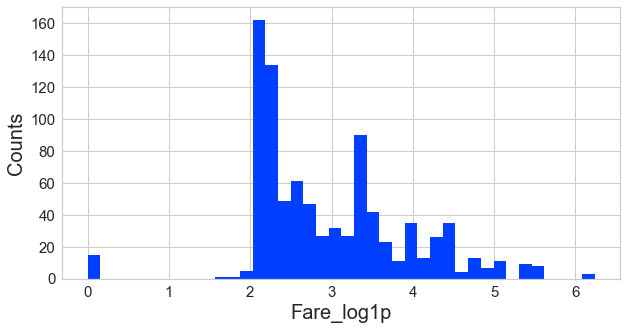

In [27]:
#Titanic Tutorial Part 2
#Graphics Analysis
#Feature Reduction (Extraction/Selection)
#Filling in Missing Values

#For Part 2 of the Titanic Tutorial, complete Steps 11-13.

# Step 11 - fill in missing values and eliminate features
#fill the missing age data with median value
def fill_na_median(data, inplace=True):
    return data.fillna(data.median(), inplace=inplace)

fill_na_median(data['Age'])

# check the result
print(data['Age'].describe())

# fill with the most represented value
def fill_na_most(data, inplace=True):
    return data.fillna('S', inplace=inplace)

fill_na_most(data['Embarked'])

# check the result
print(data['Embarked'].describe())

# import package
import numpy as np

# log-transformation
def log_transformation(data):
    return data.apply(np.log1p)

data['Fare_log1p'] = log_transformation(data['Fare'])

# check the data
#print(data.describe())

#Step 12 - adjust skewed data (fare)
#check the distribution using histogram
# set up the figure size
#%matplotlib inline
plt.rcParams['figure.figsize'] = (10, 5)

plt.hist(data['Fare_log1p'], bins=40)
plt.xlabel('Fare_log1p', fontsize=20)
plt.ylabel('Counts', fontsize=20)
plt.tick_params(axis='both', labelsize=15)
#plt.show()

#Step 13 - convert categorical data to numbers
#get the categorical data
cat_features = ['Pclass', 'Sex', "Embarked"]
data_cat = data[cat_features]
data_cat = data_cat.replace({'Pclass': {1: '1st', 2: '2nd', 3: '3rd'}})
# One Hot Encoding 
data_cat_dummies = pd.get_dummies(data_cat)
# check the data
print(data_cat_dummies.head(8))


# Included Sample Code #

In [28]:
#//*** Sample Code, Cross-Validate Models

import pandas as pd
import numpy as np
import json
import sys
import warnings
from sklearn.datasets import make_regression
from sklearn.feature_selection import RFECV
from sklearn import datasets, linear_model
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.decomposition import NMF
from sklearn import datasets
from sklearn import metrics
from sklearn.model_selection import StratifiedKFold, KFold, cross_val_score
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LogisticRegression

#11.1 Cross-Validating Models

digits = datasets.load_digits()
features=digits.data
target=digits.target
standardizer=StandardScaler()
logit=LogisticRegression()
pipeline=make_pipeline(standardizer, logit)
kf=StratifiedKFold(n_splits=10, shuffle=True, random_state=1)
cv_results=cross_val_score(pipeline, # Pipeline
                           features, # Feature matrix
                           target,#target vector
                           cv=kf, # Cross-validation technique
                           scoring = "accuracy", # Loss function
                           n_jobs = -1)
print(cv_results.mean())
print (cv_results)
print("results")

0.9666076970825573
[0.96666667 0.97222222 0.98333333 0.95555556 0.96666667 0.95
 0.97777778 0.96089385 0.96648045 0.96648045]
results


In [29]:
#Problem 11.2 – Creating a Baseline Regression Model

from sklearn.datasets import load_boston
from sklearn.dummy import DummyRegressor
from sklearn.model_selection import train_test_split

#load data
boston=load_boston()

#create features
features, target = boston.data, boston.target

#make test and training split
features_train, features_test, target_train, target_test = train_test_split(features, target, random_state=0)

#create a dummy regressor
dummy=DummyRegressor(strategy='mean')

#"Train" dummy regressor
dummy.fit(features_train, target_train)

#get R-squared score
print(dummy.score(features_test, target_test))

#to compare, train the model and evaluate the performance score

#load library
from sklearn.linear_model import LinearRegression

#train simple linear regression model
ols=LinearRegression()
ols.fit(features_train, target_train)

#get r-squared score
print(ols.score(features_test, target_test))

-0.001119359203955339
0.6354638433202129


In [30]:
#Prob 11_8 Evaluation Regression Models

#Load libraries
from sklearn.datasets import make_regression
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression

#generate features matrix, target vector
features, target=make_regression (n_samples=100,
                                  n_features = 3,
                                  n_informative = 3,
                                  n_targets = 1,
                                  noise = 50,
                                  coef = False,
                                  random_state = 1)

#create a linear regression object
ols = LinearRegression()

#cross-validate the linear regression using (negative) MSE
print("MSE:  ",cross_val_score(ols, features, target, scoring = 'neg_mean_squared_error'))

#cross-validate the linear regression using R-squared
print("R2:", cross_val_score(ols, features, target, scoring = 'r2'))


MSE:   [-1974.65337976 -2004.54137625 -3935.19355723 -1060.04361386
 -1598.74104702]
R2: [0.8622399  0.85838075 0.74723548 0.91354743 0.84469331]
